## Pickling Data
Doing this will help you save time when you want to replay the data.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [32]:
start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'google_stock_data.pkl'

In [33]:
try:
    google_stock_data = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
    google_stock_data = web.DataReader('GOOG', 'yahoo', start_date, end_date)
    google_stock_data.to_pickle(SRC_DATA_FILENAME)

In [34]:
goog_data = google_stock_data.tail(620)
goog_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-17,674.468018,645.000000,649.000000,672.929993,11164900.0,672.929993
2015-07-20,668.880005,653.010010,659.239990,663.020020,5860900.0,663.020020
2015-07-21,673.000000,654.299988,655.210022,662.299988,3377200.0,662.299988
2015-07-22,678.640015,659.000000,660.890015,662.099976,3929300.0,662.099976
2015-07-23,663.630005,641.000000,661.270020,644.280029,3029100.0,644.280029
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


#### In this plot, the following applies:
1. We draw the highs and lows of the GOOG price.
2. The green line represents the resistance level, and the red line represents the support level.
3. To build these lines, we use the maximum value of the GOOG price and the minimum value of the GOOG price stored daily.
4. After the 200th day (dotted vertical blue line), we will buy when we reach the support line, and sell when we reach the resistance line. In this example, we used 200 days so that we have sufficient data points to get an estimate of the trend.
5. It is observed that the GOOG price will reach the resistance line around August
2016. This means that we have a signal to enter a short position (sell). 
6. Once traded, we will wait to get out of this short position when the GOOG price will reach the support line.
7. With this historical data, it is easily noticeable that this condition will not happen.
8. This will result in carrying a short position in a rising market without having any signal to sell it, thereby resulting in a huge loss.
9. This means that, even if the trading idea based on support/resistance has strong grounds in terms of economical behavior, in reality, we will need to modify this trading strategy to make it work.
10. Moving the support/resistance line to adapt to the market evolution will be key to the trading strategy efficiency

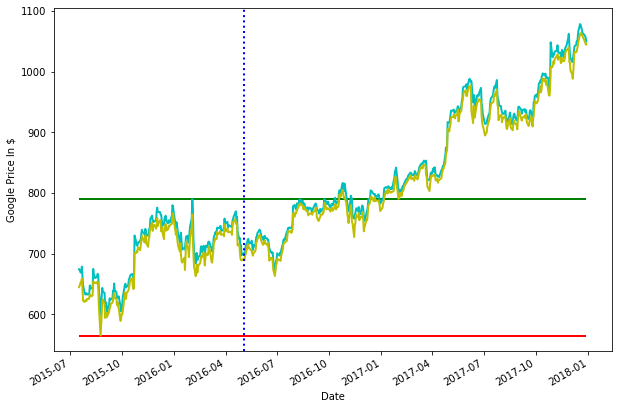

In [35]:
fig = plt.figure(figsize = (10, 7))


ax1 = fig.add_subplot(111, ylabel = 'Google Price In $')
high.plot(ax = ax1, color = 'c', lw = 2)

low.plot(ax = ax1, color = 'y', lw = 2)

plt.hlines(high.head(200).max(),low.index.values[0],low.index.values[-1]
,linewidth=2, color='g')
plt.hlines(low.head(200).min(),low.index.values[0],low.index.values[-1],
linewidth=2, color='r')
plt.axvline(linewidth=2,color='b',x=low.index.values[200],linestyle=':')

plt.show()

In [36]:
google_data_signal = pd.DataFrame(google_stock_data, index = google_stock_data.index)

In [37]:
google_data_signal['Price'] = google_data_signal['Adj Close']